In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [5]:
data.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [6]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
data['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [8]:
data['Attrition']=data['Attrition'].replace(['Yes','No'],[1,0])
data['Attrition'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

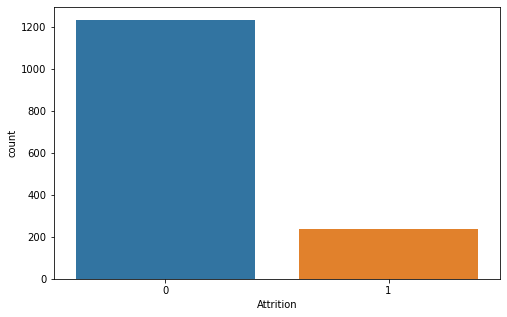

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='Attrition',data=data)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

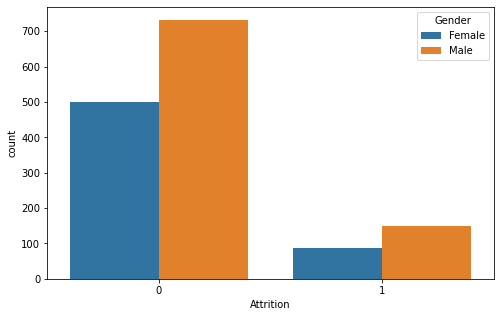

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='Attrition',data=data,hue=data['Gender'])

<AxesSubplot:xlabel='Department', ylabel='count'>

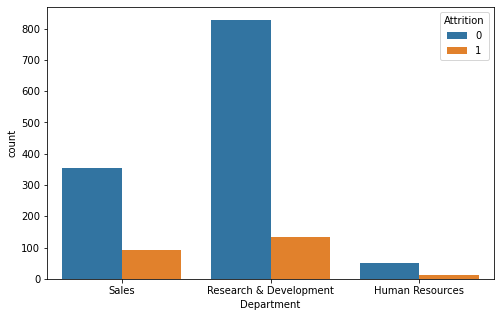

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x='Department',hue='Attrition',data=data)

<AxesSubplot:xlabel='Age', ylabel='count'>

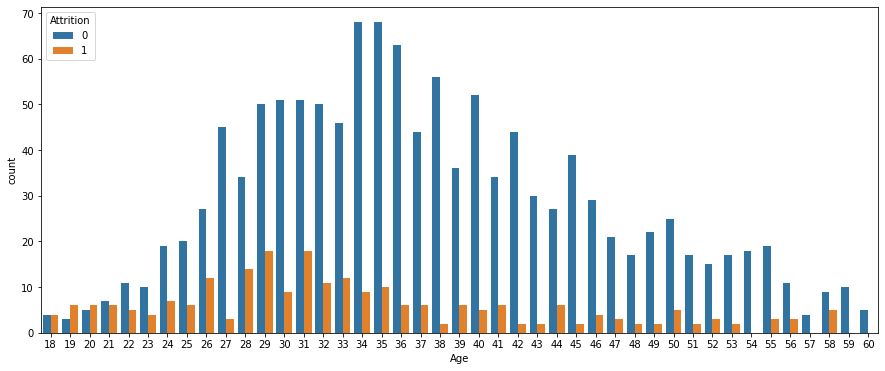

In [12]:
plt.figure(figsize=(15,6))
sns.countplot(x='Age',hue='Attrition',data=data)

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

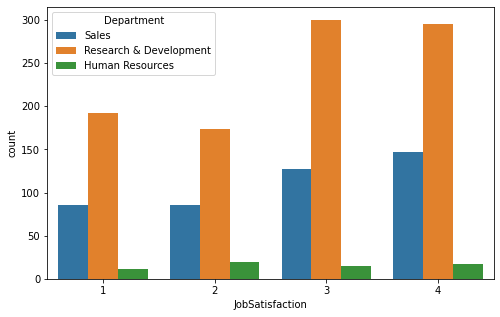

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x='JobSatisfaction',hue='Department',data=data)

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

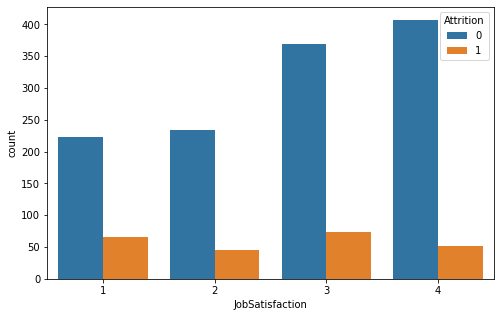

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x='JobSatisfaction',hue='Attrition',data=data)

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

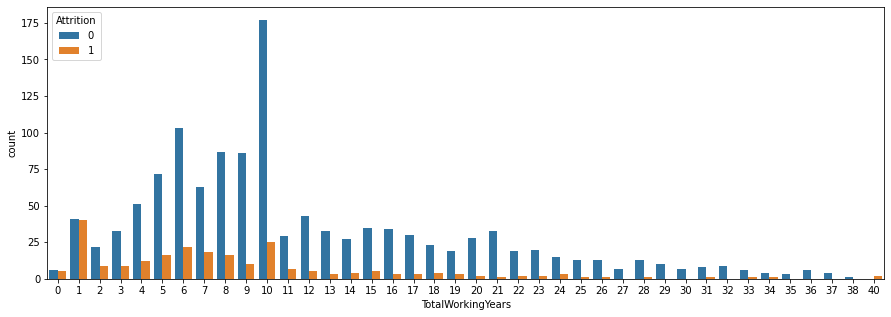

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(x='TotalWorkingYears',hue='Attrition',data=data)

<AxesSubplot:xlabel='OverTime', ylabel='count'>

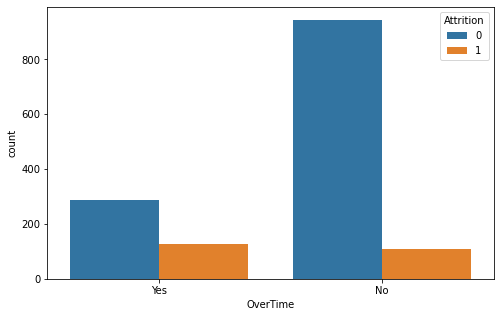

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='OverTime',hue='Attrition',data=data)

In [17]:
data=data.drop(['StandardHours','EmployeeCount','EmployeeNumber','Over18'],axis=1)

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.0,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0


In [19]:
data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [20]:
data['BusinessTravel']=data['BusinessTravel'].replace(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'],[0,1,2])
data['BusinessTravel'].unique()

array([0, 1, 2], dtype=int64)

In [21]:
data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [22]:
data['Department']=data['Department'].replace(['Sales', 'Research & Development', 'Human Resources'],[0,1,2])
data['Department'].unique()

array([0, 1, 2], dtype=int64)

In [23]:
data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [24]:
data['EducationField']=data['EducationField'].replace(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'],[0,1,2,3,4,5])
data['EducationField'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [25]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [26]:
data['Gender']=data['Gender'].replace(['Female', 'Male'],[0,1])
data['Gender'].unique()

array([0, 1], dtype=int64)

In [27]:
data['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [28]:
data['MaritalStatus']=data['MaritalStatus'].replace(['Single', 'Married', 'Divorced'],[0,1,2])
data['MaritalStatus'].unique()

array([0, 1, 2], dtype=int64)

In [29]:
data['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [30]:
data['OverTime']=data['OverTime'].replace(['Yes', 'No'],[0,1])
data['OverTime'].unique()

array([0, 1], dtype=int64)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   int64 
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [32]:
train,test=train_test_split(data,test_size=0.2)

In [33]:
train_x=train[['Age','BusinessTravel','DailyRate','Department','EducationField','EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MaritalStatus','MonthlyIncome','OverTime','PercentSalaryHike','PerformanceRating','TotalWorkingYears','YearsAtCompany']]
train_y=train['Attrition']

test_x=train[['Age','BusinessTravel','DailyRate','Department','EducationField','EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MaritalStatus','MonthlyIncome','OverTime','PercentSalaryHike','PerformanceRating','TotalWorkingYears','YearsAtCompany']]
test_y=train['Attrition']

In [34]:
tree=DecisionTreeClassifier()
tree.fit(train_x,train_y)
predct=tree.predict(test_x)
metrics.accuracy_score(test_y,predct)

1.0

In [35]:
RFR=RandomForestClassifier()
RFR.fit(train_x,train_y)
predct=RFR.predict(test_x)
metrics.accuracy_score(test_y,predct)

1.0

In [36]:
vector=SVC()
vector.fit(train_x,train_y)
predct=vector.predict(test_x)
metrics.accuracy_score(test_y,predct)

0.8418367346938775

In [37]:
KNC=KNeighborsClassifier()
KNC.fit(train_x,train_y)
predct=KNC.predict(test_x)
metrics.accuracy_score(test_y,predct)

0.8562925170068028

In [38]:
gauss=GaussianNB()
gauss.fit(train_x,train_y)
predct=gauss.predict(test_x)
metrics.accuracy_score(test_y,predct)

0.8537414965986394